In [3]:
import os
import glob

def count_images_in_folder(folder_path, image_extensions=['*.png', '*.jpg', '*.jpeg']):
    counts = {}

    for root, dirs, files in os.walk(folder_path):
        count = 0
        for extension in image_extensions:
            image_files = glob.glob(os.path.join(root, extension))
            count += len(image_files)
        
        counts[root] = count

    return counts

folder_path = 'data/train/'
subfolder_counts = count_images_in_folder(folder_path)

for subfolder, count in subfolder_counts.items():
    print(f'The number of images in {subfolder} is: {count}')


The number of images in data/train/ is: 0
The number of images in data/train/0 is: 465
The number of images in data/train/A is: 468
The number of images in data/train/B is: 473
The number of images in data/train/C is: 469
The number of images in data/train/D is: 466
The number of images in data/train/E is: 468
The number of images in data/train/F is: 498
The number of images in data/train/G is: 462
The number of images in data/train/H is: 495
The number of images in data/train/I is: 471
The number of images in data/train/J is: 500
The number of images in data/train/K is: 492
The number of images in data/train/L is: 465
The number of images in data/train/M is: 495
The number of images in data/train/N is: 490
The number of images in data/train/O is: 501
The number of images in data/train/P is: 465
The number of images in data/train/Q is: 464
The number of images in data/train/R is: 473
The number of images in data/train/S is: 465
The number of images in data/train/T is: 467
The number of

In [4]:
import os
import glob

def count_images_in_folder(folder_path, image_extensions=['*.png', '*.jpg', '*.jpeg']):
    counts = {}

    for root, dirs, files in os.walk(folder_path):
        count = 0
        for extension in image_extensions:
            image_files = glob.glob(os.path.join(root, extension))
            count += len(image_files)
        
        counts[root] = count

    return counts

folder_path = 'data/test/'
subfolder_counts = count_images_in_folder(folder_path)

for subfolder, count in subfolder_counts.items():
    print(f'The number of images in {subfolder} is: {count}')


The number of images in data/test/ is: 0
The number of images in data/test/0 is: 154
The number of images in data/test/A is: 156
The number of images in data/test/B is: 157
The number of images in data/test/C is: 156
The number of images in data/test/D is: 155
The number of images in data/test/E is: 156
The number of images in data/test/F is: 165
The number of images in data/test/G is: 153
The number of images in data/test/H is: 165
The number of images in data/test/I is: 157
The number of images in data/test/J is: 166
The number of images in data/test/K is: 164
The number of images in data/test/L is: 155
The number of images in data/test/M is: 165
The number of images in data/test/N is: 163
The number of images in data/test/O is: 167
The number of images in data/test/P is: 155
The number of images in data/test/Q is: 154
The number of images in data/test/R is: 157
The number of images in data/test/S is: 154
The number of images in data/test/T is: 155
The number of images in data/test/U

In [11]:
import os
import pandas as pd

# Correct the variable name from base_path to base_path
base_path = "data/train/"

# Dictionary to save our 36 classes
categories = {
    0: 0,
    1: "A",
    2: "B",
    3: "C",
    4: "D",
    5: "E",
    6: "F",
    7: "G",
    8: "H",
    9: "I",
    10: "J",
    11: "K",
    12: "L",
    13: "M",
    14: "N",
    15: "O",
    16: "P",
    17: "Q",
    18: "R",
    19: "S",
    20: "T",
    21: "U",
    22: "V",
    23: "W",
    24: "X",
    25: "Y",
    26: "Z"
}

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].astype(str)  # Ensure the column is of string type
    df[col_name] = df["category"].astype(str) + '_' + df[col_name]
    return df

# list containing all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + str(categories[category]))  # Corrected here
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)


In [24]:
print(df)

         filename  category
0       6_646.jpg         6
1       26_45.jpg        26
2      19_419.jpg        19
3       2_373.jpg         2
4       6_191.jpg         6
...           ...       ...
12840   0_228.jpg         0
12841  26_317.jpg        26
12842   9_299.jpg         9
12843  17_545.jpg        17
12844  26_405.jpg        26

[12845 rows x 2 columns]


In [5]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
from keras.callbacks import EarlyStopping

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
size = 128
num_classes = 27
#CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(size, size, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the layers
classifier.add(Flatten())
# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=num_classes, activation='softmax'))

# Compiling CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [6]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(size, size),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

testing_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(size , size),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical') 

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

classifier.fit_generator(
        training_set,
        steps_per_epoch= training_set.samples, # No of images in training set
        epochs=5,
        validation_data=testing_set,
        validation_steps=testing_set.samples, # No of images in test set
        callbacks=[early_stopping]
        )


Found 12845 images belonging to 27 classes.
Found 4268 images belonging to 27 classes.


C:\Users\Namita Garg\AppData\Local\Temp\ipykernel_30476\3393356054.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/5
12845/12845 [==============================] - 514s 40ms/step - loss: 1.9751 - accuracy: 0.3901 - val_loss: 0.3772 - val_accuracy: 0.9030


In [7]:
# Saving the model
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('model.h5')
print('Weights saved')

Model Saved
Weights saved


In [8]:
evaluation_result = classifier.evaluate_generator(testing_set, steps=testing_set.samples)
print("Evaluation Result:", evaluation_result)

C:\Users\Namita Garg\AppData\Local\Temp\ipykernel_30476\2327778328.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluation_result = classifier.evaluate_generator(testing_set, steps=testing_set.samples)


Evaluation Result: [0.3772176504135132, 0.9029990434646606]


In [9]:

# Evaluate for training generator
train_loss, train_acc = classifier.evaluate_generator(training_set, steps=len(training_set))
print('The accuracy of the model for training data is:', train_acc * 100)
print('The Loss of the model for training data is:', train_loss)

# Evaluate for testing generator
test_loss, test_acc = classifier.evaluate_generator(testing_set, steps=len(testing_set))
print('The accuracy of the model for testing data is:', test_acc * 100)
print('The Loss of the model for testing data is:', test_loss)

C:\Users\Namita Garg\AppData\Local\Temp\ipykernel_30476\1242323587.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_loss, train_acc = classifier.evaluate_generator(training_set, steps=len(training_set))


The accuracy of the model for training data is: 86.74970865249634
The Loss of the model for training data is: 0.5254989862442017


C:\Users\Namita Garg\AppData\Local\Temp\ipykernel_30476\1242323587.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = classifier.evaluate_generator(testing_set, steps=len(testing_set))


The accuracy of the model for testing data is: 90.29990434646606
The Loss of the model for testing data is: 0.37721768021583557


1/1 [==============================] - 0s 48ms/step


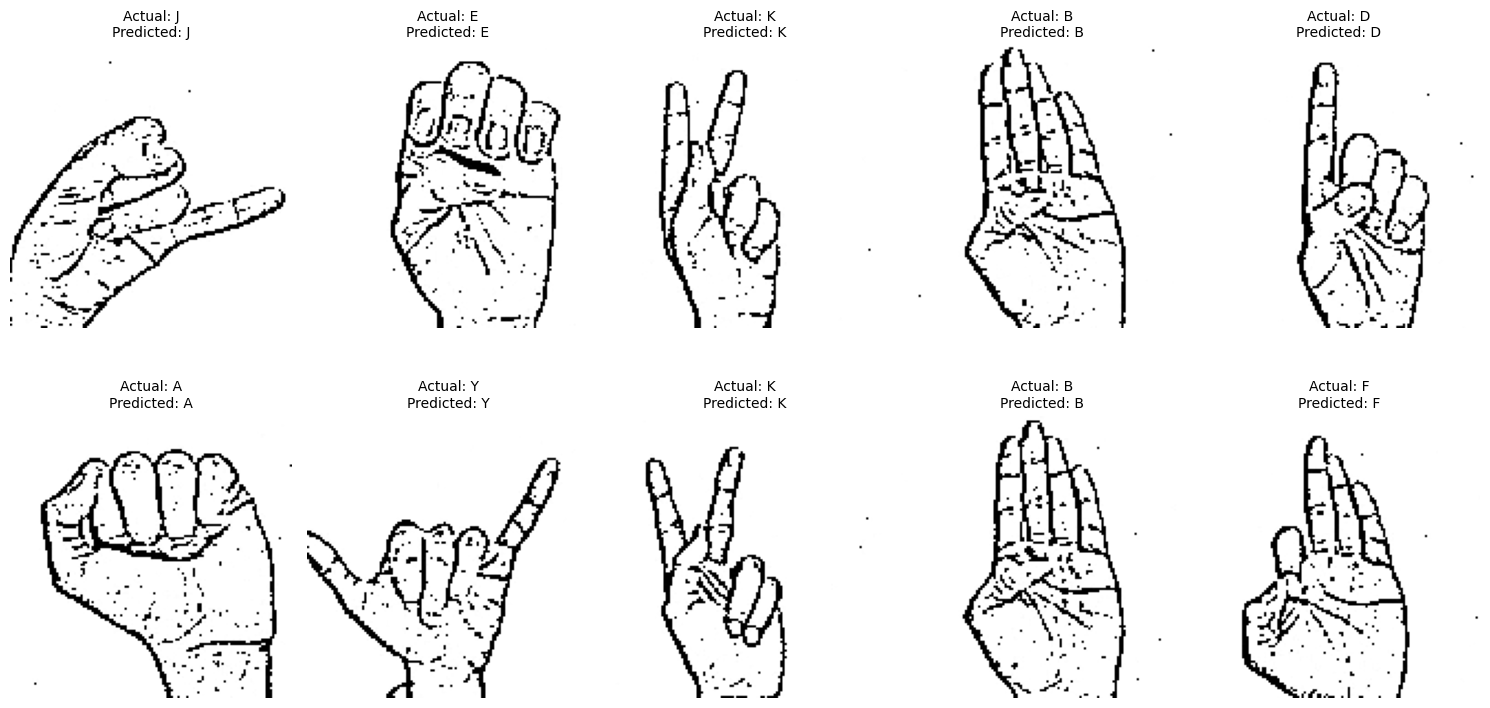

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random

X_test, y_test = testing_set.next()

predicted_probabilities = classifier.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# labels
labels = [0,'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
          'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
          'W', 'X', 'Y', 'Z']


num_samples = 10
selected_indices = set()

plt.figure(figsize=(15, 8))

for i in range(num_samples):
    # Ensure unique index selection
    while True:
        index = random.randint(0, len(X_test) - 1)
        if index not in selected_indices:
            selected_indices.add(index)
            break

    image = X_test[index].squeeze()  

    # Extract class index from one-hot encoded format
    true_label = labels[np.argmax(y_test[index])]
    predicted_label = labels[predicted_classes[index]]

    plt.subplot(2, num_samples // 2, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Actual: {true_label}\nPredicted: {predicted_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


C:\Users\Namita Garg\AppData\Local\Temp\ipykernel_30476\4042463400.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = classifier.predict_generator(data_generator, steps=len(data_generator), verbose=1)


427/427 [==============================] - 9s 21ms/step


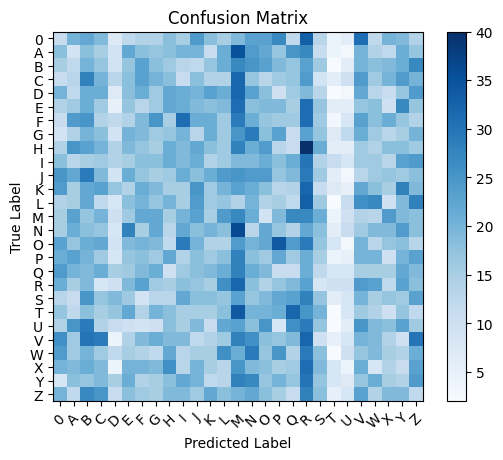

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing import image

#generate predictions for a generator
def generate_predictions(data_generator):
    predictions = classifier.predict_generator(data_generator, steps=len(data_generator), verbose=1)
    return predictions

# Generate predictions for sets
train_predictions = generate_predictions(training_set)
test_predictions = generate_predictions(testing_set)

#confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.show()

# Plot confusion matrix for training set
plot_confusion_matrix(training_set.classes, np.argmax(train_predictions, axis=1), training_set.class_indices)


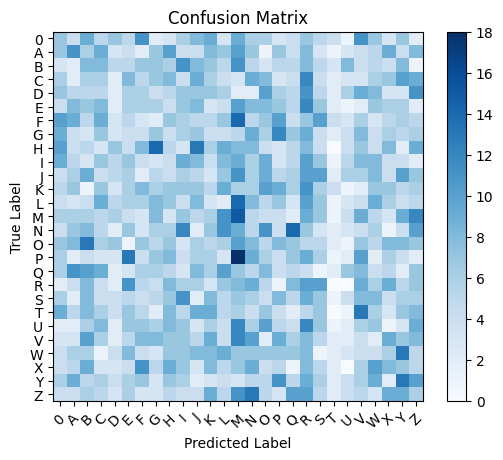

In [26]:
#confusion matrix-testing
plot_confusion_matrix(testing_set.classes, np.argmax(test_predictions, axis=1), testing_set.class_indices)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing import image
cm = confusion_matrix(testing_set.classes, np.argmax(test_predictions, axis=1))
true_positive = np.diag(cm)
false_positive = np.sum(cm, axis=0) - true_positive
false_negative = np.sum(cm, axis=1) - true_positive

# Overall accuracy
accuracy = np.sum(true_positive) / np.sum(cm)

# Precision
precision = true_positive / (true_positive + false_positive)

# Recall
recall = true_positive / (true_positive + false_negative)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics
print(f"Overall Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Overall Accuracy: 0.038425492033739454
Precision: [0.04545455 0.07638889 0.04494382 0.03797468 0.02       0.03773585
 0.02013423 0.04697987 0.0295858  0.05325444 0.03012048 0.03067485
 0.01219512 0.06147541 0.02688172 0.0295858  0.02547771 0.03424658
 0.04237288 0.04605263 0.         0.02352941 0.02312139 0.02531646
 0.05479452 0.07602339 0.03428571]
Recall: [0.04545455 0.07051282 0.05095541 0.03846154 0.01290323 0.03846154
 0.01818182 0.04575163 0.03030303 0.05732484 0.03012048 0.0304878
 0.01290323 0.09090909 0.03067485 0.02994012 0.02580645 0.03246753
 0.06369427 0.04545455 0.         0.0130719  0.02453988 0.02564103
 0.05228758 0.08227848 0.03846154]
F1 Score: [0.04545455 0.07333333 0.04776119 0.03821656 0.01568627 0.03809524
 0.01910828 0.04635762 0.02994012 0.05521472 0.03012048 0.03058104
 0.01253918 0.07334963 0.0286533  0.0297619  0.02564103 0.03333333
 0.05089059 0.04575163        nan 0.01680672 0.02380952 0.02547771
 0.05351171 0.07902736 0.03625378]


C:\Users\Namita Garg\AppData\Local\Temp\ipykernel_30476\2549802496.py:20: RuntimeWarning: invalid value encountered in divide
  f1_score = 2 * (precision * recall) / (precision + recall)
